In [140]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
#from sklearn.model_selection import cross_val_score
#from sklearn.tree import DecisionTreeRegressor

In [141]:
dataset = pd.read_csv("ML1.csv")

dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Health expenditure,GDP,Schooling,Polio,Hepatitis B,Measles,Diphtheria,HIV/AIDS,Alcohol,Thinness 1-19 years,Thinness 5-9 years,BMI
0,Afghanistan,2000,Developing,54.8,321.0,8.20,114.560000,5.5,24.0,62.0,6532,24.0,0.1,0.01,2.3,2.5,12.2
1,Afghanistan,2001,Developing,55.3,316.0,7.80,117.496980,5.9,35.0,63.0,8762,33.0,0.1,0.01,2.1,2.4,12.6
2,Afghanistan,2002,Developing,56.2,3.0,7.76,187.845950,6.2,36.0,64.0,2486,36.0,0.1,0.01,19.9,2.2,13.0
3,Afghanistan,2003,Developing,56.7,295.0,8.82,198.728544,6.5,41.0,65.0,798,41.0,0.1,0.01,19.7,19.9,13.4
4,Afghanistan,2004,Developing,57.0,293.0,8.79,219.141353,6.8,5.0,67.0,466,5.0,0.1,0.02,19.5,19.7,13.8


In [142]:
dataset.shape

(2572, 17)

In [143]:
updated_df = dataset
updated_df['Life expectancy']=updated_df['Life expectancy'].fillna(updated_df['Life expectancy'].mean())
updated_df['GDP']=updated_df['GDP'].fillna(updated_df['GDP'].mean())
updated_df['Adult Mortality']=updated_df['Adult Mortality'].fillna(updated_df['Adult Mortality'].mean())
updated_df['Health expenditure']=updated_df['Health expenditure'].fillna(updated_df['Health expenditure'].mean())
updated_df['Schooling']=updated_df['Schooling'].fillna(updated_df['Schooling'].mean())
updated_df['Polio']=updated_df['Polio'].fillna(updated_df['Polio'].mean())
updated_df['Hepatitis B']=updated_df['Hepatitis B'].fillna(updated_df['Hepatitis B'].mean())
updated_df['Diphtheria']=updated_df['Diphtheria'].fillna(updated_df['Diphtheria'].mean())
updated_df['Alcohol']=updated_df['Alcohol'].fillna(updated_df['Alcohol'].mean())
updated_df['Thinness  1-19 years']=updated_df['Thinness  1-19 years'].fillna(updated_df['Thinness  1-19 years'].mean())
updated_df['Thinness 5-9 years']=updated_df['Thinness 5-9 years'].fillna(updated_df['Thinness 5-9 years'].mean())
updated_df['BMI']=updated_df['BMI'].fillna(updated_df['BMI'].mean())
updated_df.info()
updated_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2572 entries, 0 to 2571
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               2572 non-null   object 
 1   Year                  2572 non-null   int64  
 2   Status                2572 non-null   object 
 3   Life expectancy       2572 non-null   float64
 4   Adult Mortality       2572 non-null   float64
 5   Health expenditure    2572 non-null   float64
 6   GDP                   2572 non-null   float64
 7   Schooling             2572 non-null   float64
 8   Polio                 2572 non-null   float64
 9   Hepatitis B           2572 non-null   float64
 10  Measles               2572 non-null   int64  
 11  Diphtheria            2572 non-null   float64
 12  HIV/AIDS              2572 non-null   float64
 13  Alcohol               2572 non-null   float64
 14  Thinness  1-19 years  2572 non-null   float64
 15  Thinness 5-9 years   

Country                 0
Year                    0
Status                  0
Life expectancy         0
Adult Mortality         0
Health expenditure      0
GDP                     0
Schooling               0
Polio                   0
Hepatitis B             0
Measles                 0
Diphtheria              0
HIV/AIDS                0
Alcohol                 0
Thinness  1-19 years    0
Thinness 5-9 years      0
BMI                     0
dtype: int64

In [144]:
y = updated_df.pop("Life expectancy") # define the target variable (dependent variable) as y
y

0       54.8
1       55.3
2       56.2
3       56.7
4       57.0
        ... 
2567    50.0
2568    52.4
2569    54.9
2570    56.6
2571    58.0
Name: Life expectancy, Length: 2572, dtype: float64

In [145]:
df_OneHot = pd.get_dummies(updated_df[["Country","Status"]])
df_OneHot

,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [146]:
updated_df = updated_df.drop(["Country", "Status"],axis=1)

In [147]:
x = updated_df.join(df_OneHot)

In [148]:
# create training and testing variables
# Understand this more!
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2057, 209) (2057,)
(515, 209) (515,)


In [149]:
# fit a model
#Need to change catagorical values into numerical values (Country + Status)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [150]:
predictions = lm.predict(X_test)
predictions

array([75.25602453, 78.47675065, 79.34005437, 70.14935118, 71.22292157,
       75.33351222, 58.8920235 , 75.33197514, 75.21429083, 63.69604517,
       74.57444184, 80.7792557 , 75.54533284, 74.11371449, 79.50835598,
       65.03338421, 52.03792005, 70.53092271, 71.14933783, 77.05150594,
       83.10602434, 70.76991463, 63.5714266 , 74.63453141, 81.46576035,
       56.57784333, 73.15016861, 77.62354674, 73.12454104, 73.45716071,
       78.81616349, 73.85963238, 65.42068947, 57.49850062, 60.21427044,
       73.90097883, 68.05077193, 81.40454351, 54.31668061, 75.66216241,
       62.44568943, 72.01613721, 73.08623395, 73.4802355 , 74.44856445,
       68.83735259, 76.46203338, 67.48776566, 68.01751174, 70.08072372,
       66.4194851 , 68.87749033, 55.45537209, 68.00142025, 65.36380925,
       79.92037943, 45.37379163, 69.68315719, 78.8561497 , 76.63891217,
       56.60558539, 51.97833116, 71.96446594, 66.85187558, 65.13791481,
       81.88087894, 44.4015828 , 63.94375472, 81.87539073, 76.40

Text(0, 0.5, 'Predictions')

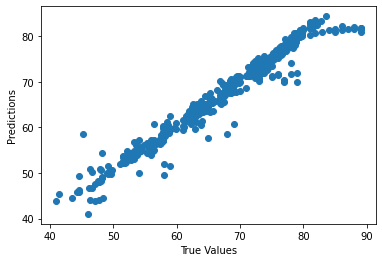

In [151]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [152]:
score =model.score(X_test, y_test)
score

0.9572692784537241

In [153]:
X, y = (x, y)

In [154]:
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X, y, cv=10)

array([0.86699642, 0.87518548, 0.77986214, 0.76108668, 0.81057662,
       0.88761123, 0.87609458, 0.72259052, 0.77927824, 0.88176914])

In [155]:
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

NameError: name 'DecisionTreeClassifier' is not defined